<a href="https://colab.research.google.com/github/swarup1606/DATA_SCIENCE_INTERNSHIP/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
61486,49862,-0.987401,1.056011,1.184880,-0.738908,-0.080874,-0.167563,0.224570,0.650254,-0.454139,...,-0.069511,-0.149341,-0.022932,0.040407,-0.291335,0.307241,0.190307,0.104660,1.00,0.0
61487,49862,0.910338,-0.976578,1.308543,0.352233,-1.228617,1.053119,-1.189630,0.422435,-0.756288,...,0.081774,0.571815,-0.057231,-0.292605,0.065126,-0.226463,0.114948,0.054243,129.50,0.0
61488,49863,1.033813,-0.261495,1.329732,1.820041,-0.974670,0.384867,-0.580740,0.317767,1.384514,...,-0.398950,-0.748977,0.126709,0.367238,0.342699,-0.527094,0.082915,0.031702,22.02,0.0
61489,49863,1.446884,-0.263871,-0.192448,-0.660946,-0.598712,-1.387964,-0.001654,-0.430535,-1.207218,...,0.194922,0.511846,-0.170092,0.445334,0.805625,-0.086404,-0.026795,0.002982,15.00,0.0
61490,49863,-1.256173,0.190250,0.486835,0.174933,0.615589,0.667585,0.983123,0.049528,0.077344,...,-0.024591,0.195936,-0.204945,-0.850277,-0.393942,-0.584722,-0.117240,0.287411,NaN,NaN


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61491 entries, 0 to 61490
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    61491 non-null  int64  
 1   V1      61491 non-null  float64
 2   V2      61491 non-null  float64
 3   V3      61491 non-null  float64
 4   V4      61491 non-null  float64
 5   V5      61491 non-null  float64
 6   V6      61491 non-null  float64
 7   V7      61491 non-null  float64
 8   V8      61491 non-null  float64
 9   V9      61491 non-null  float64
 10  V10     61491 non-null  float64
 11  V11     61491 non-null  float64
 12  V12     61491 non-null  float64
 13  V13     61491 non-null  float64
 14  V14     61491 non-null  float64
 15  V15     61491 non-null  float64
 16  V16     61491 non-null  float64
 17  V17     61491 non-null  float64
 18  V18     61491 non-null  float64
 19  V19     61491 non-null  float64
 20  V20     61491 non-null  float64
 21  V21     61491 non-null  float64
 22

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0.0    61327
1.0      163
Name: count, dtype: int64

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(61327, 31)
(163, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    61327.000000
mean        95.440607
std        268.755957
min          0.000000
25%          7.680000
50%         26.050000
75%         87.500000
max      19656.530000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     163.000000
mean       93.113006
std       224.038967
min         0.000000
25%         1.000000
50%         4.560000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,32324.644936,-0.219130,-0.022741,0.714029,0.155790,-0.249115,0.108587,-0.095739,0.048561,0.062135,...,0.047195,-0.030415,-0.107187,-0.039512,0.006212,0.135851,0.01988,0.000884,0.004422,95.440607
1.0,28708.325153,-7.056144,5.067518,-9.516816,5.526487,-5.205203,-2.148640,-7.428797,3.415973,-3.338006,...,0.421982,0.850389,-0.198696,-0.261889,-0.079897,0.238777,0.12118,0.560332,0.035769,93.113006


In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
31948,36576,0.989022,-0.617373,0.643872,0.569889,-0.572528,0.735982,-0.586473,0.258165,0.721217,...,-0.042953,-0.227706,-0.232225,-0.780259,0.339700,0.358214,-0.010462,0.026435,128.95,0.0
23509,32792,-0.656915,1.074680,-0.488614,0.203645,2.193372,3.802445,-0.233912,1.396167,-0.588304,...,-0.071861,-0.163324,-0.156650,1.013381,0.165526,-0.235360,0.289606,0.135958,12.99,0.0
12042,20852,1.019849,-0.415504,1.070979,-0.659806,-0.426898,1.093823,-0.928408,0.418755,2.949772,...,-0.006456,0.640575,0.125191,-0.651855,0.140629,-0.620504,0.141692,0.020956,11.85,0.0
21880,31909,-0.218891,0.664385,1.006618,0.656872,0.015233,-0.575789,0.922817,-0.060114,-0.432444,...,0.245247,0.626311,0.162429,0.387560,-0.445215,-0.468403,0.109638,0.102670,73.50,0.0
34073,37500,-1.298384,0.713273,2.827428,1.383036,-1.337787,1.122419,-0.657150,-1.145962,0.962624,...,1.645482,0.285580,-0.400372,0.626170,0.307438,0.006358,0.319162,0.071485,102.91,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
57470,47923,0.364377,1.443523,-2.220907,2.036985,-1.237055,-1.728161,-2.058582,0.358895,-1.393306,...,0.402730,-0.132129,-0.032977,0.460861,0.560404,0.409366,0.539668,0.296918,0.76,1.0
57615,47982,-1.232804,2.244119,-1.703826,1.492536,-1.192985,-1.686110,-1.864612,0.856122,-1.973535,...,0.560475,0.165682,-0.013754,0.474935,-0.218725,0.302809,0.466031,0.250134,0.76,1.0
58422,48380,-2.790771,-1.464269,1.031165,1.921356,-0.090014,-0.483871,0.780731,-0.348776,0.609133,...,-0.392667,0.440020,0.777659,0.418552,0.244563,-0.159361,0.060540,0.356958,208.58,1.0
58761,48533,1.243848,0.524526,-0.538884,1.209196,0.479538,-0.197429,0.049166,0.037792,0.128119,...,-0.051660,-0.084089,-0.192846,-0.917392,0.681953,-0.194419,0.045917,0.040136,1.00,1.0
59539,48884,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,...,0.696955,0.740003,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,19.73,1.0


In [ ]:
new_dataset['Class'].value_counts()

Class
0.0    492
1.0    163
Name: count, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,33136.313008,-0.232650,-0.041048,0.812708,0.145266,-0.293352,0.119058,-0.092588,0.010841,0.080441,...,0.077812,-0.014820,-0.042147,-0.001497,-0.002371,0.138616,0.023461,-0.025616,0.018302,96.933496
1.0,28708.325153,-7.056144,5.067518,-9.516816,5.526487,-5.205203,-2.148640,-7.428797,3.415973,-3.338006,...,0.421982,0.850389,-0.198696,-0.261889,-0.079897,0.238777,0.121180,0.560332,0.035769,93.113006


In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

        Time        V1        V2        V3        V4        V5        V6  \
31948  36576  0.989022 -0.617373  0.643872  0.569889 -0.572528  0.735982   
23509  32792 -0.656915  1.074680 -0.488614  0.203645  2.193372  3.802445   
12042  20852  1.019849 -0.415504  1.070979 -0.659806 -0.426898  1.093823   
21880  31909 -0.218891  0.664385  1.006618  0.656872  0.015233 -0.575789   
34073  37500 -1.298384  0.713273  2.827428  1.383036 -1.337787  1.122419   
...      ...       ...       ...       ...       ...       ...       ...   
57470  47923  0.364377  1.443523 -2.220907  2.036985 -1.237055 -1.728161   
57615  47982 -1.232804  2.244119 -1.703826  1.492536 -1.192985 -1.686110   
58422  48380 -2.790771 -1.464269  1.031165  1.921356 -0.090014 -0.483871   
58761  48533  1.243848  0.524526 -0.538884  1.209196  0.479538 -0.197429   
59539  48884 -2.139051  1.394368 -0.612035  1.049327 -1.162102 -0.768219   

             V7        V8        V9  ...       V20       V21       V22  \
31948 -0.5864

In [ ]:
print(Y)

31948    0.0
23509    0.0
12042    0.0
21880    0.0
34073    0.0
        ... 
57470    1.0
57615    1.0
58422    1.0
58761    1.0
59539    1.0
Name: Class, Length: 655, dtype: float64


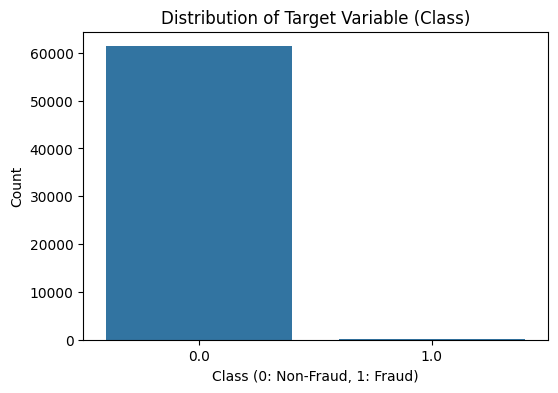

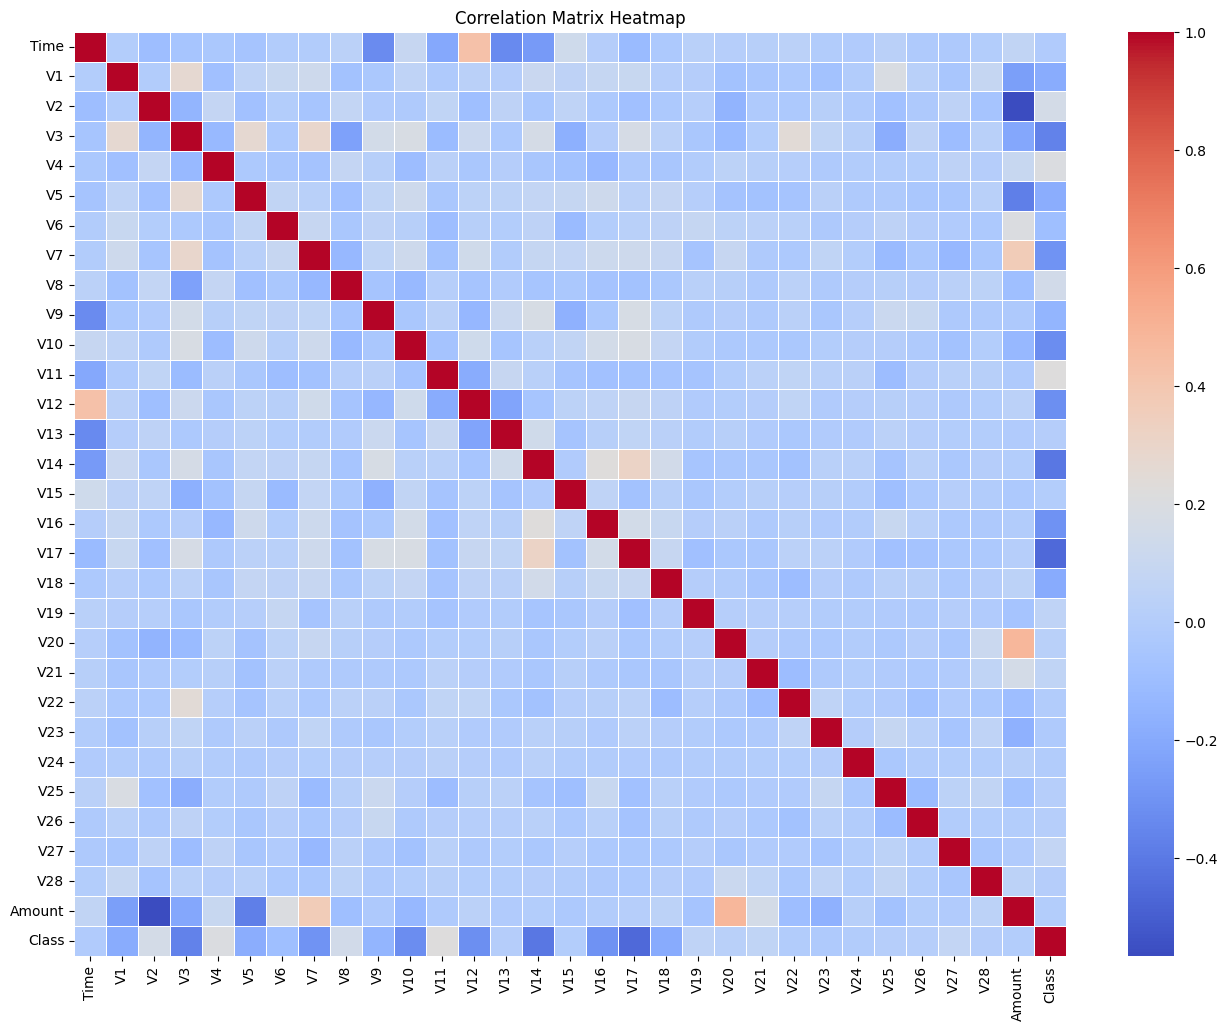

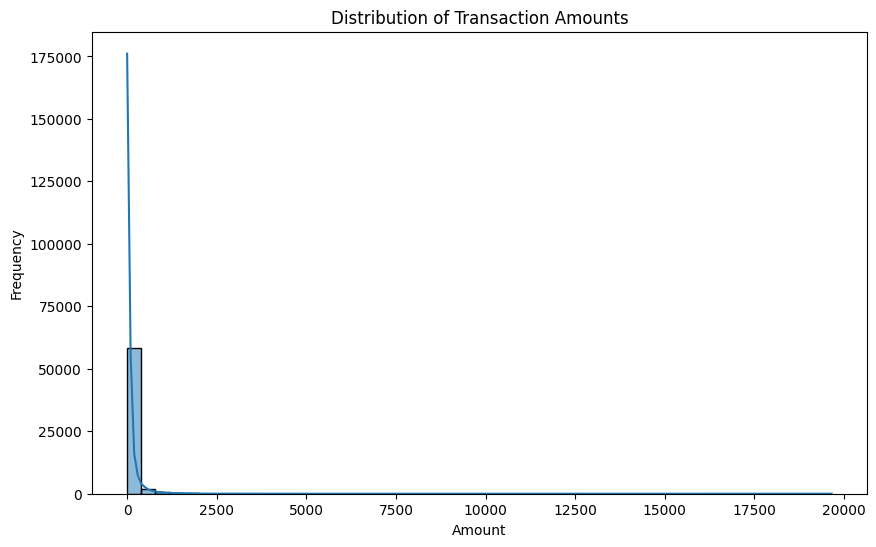

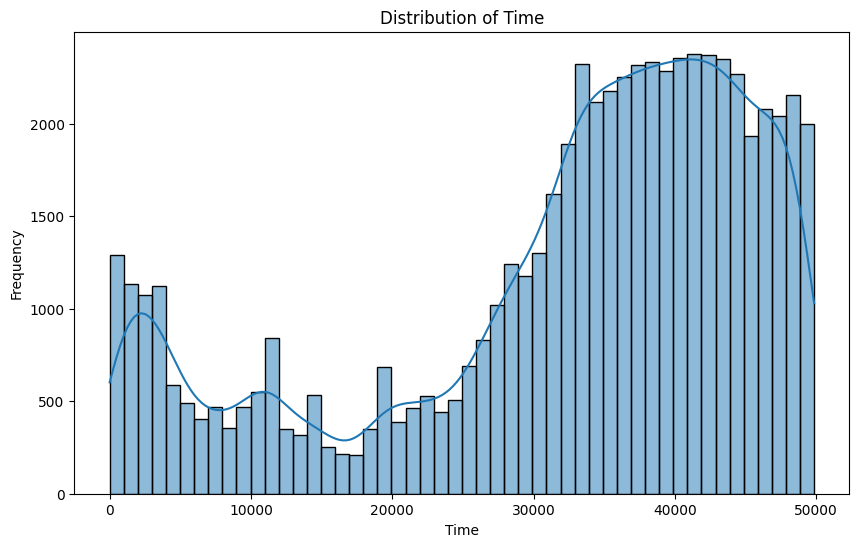

In [ ]:
# @title visualizations will help you understand the distribution of the data and the relationship between features and the target variable
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=credit_card_data)
plt.title('Distribution of Target Variable (Class)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

# Plot correlation matrix heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = credit_card_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Plot distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of time
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_data['Time'], bins=50, kde=True)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(655, 30) (524, 30) (131, 30)


In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9770992366412213


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9770992366412213
